# 先来看看cifar-10数据集的样子

In [1]:
import numpy as np
import pickle
import os
import tensorflow

## 数据形式

In [2]:
CIFAR = './cifar-10'
os.listdir(CIFAR)
from collections import Counter
with open(os.path.join(CIFAR,'data_batch_1') , 'rb') as f:
    data = pickle.load(f,encoding='bytes')
    print(type(data))
    print(data.keys())
    

<class 'dict'>
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [3]:
with open(os.path.join(CIFAR,'data_batch_1') , 'rb') as f:
    data = pickle.load(f,encoding='bytes')
    print(type(data[b'data']))
    print(type(data[b'batch_label']))
    print(type(data[b'labels']))
    print(type(data[b'filenames']))
    print(data[b'data'].shape)
    print(Counter(data[b'labels']))
    print(data[b'filenames'][1])
    print(data[b'data'][:2])
    print(data[b'labels'][:2])

<class 'numpy.ndarray'>
<class 'bytes'>
<class 'list'>
<class 'list'>
(10000, 3072)
Counter({2: 1032, 6: 1030, 8: 1025, 3: 1016, 0: 1005, 7: 1001, 4: 999, 9: 981, 1: 974, 5: 937})
b'camion_s_000148.png'
[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]]
[6, 9]


## 看看图片  随便挑一张

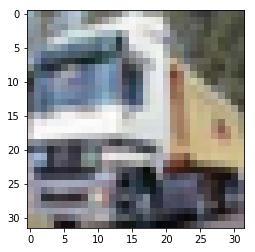

In [4]:
image_arr = data[b'data'][1]
image_arr = image_arr.reshape((3,32,32))
image_arr = image_arr.transpose((1,2,0))
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline
imshow(image_arr)

# 得到训练数据和测试数据

In [5]:
def load_data(filename):
    """read data from data file."""
    with open(filename, 'rb') as f:
        data = pickle.load(f, encoding='bytes')
        return data[b'data'], data[b'labels']

# tensorflow.Dataset.
class CifarData:
    def __init__(self, filenames):
        all_data = []
        all_labels = []
        for filename in filenames:
            data, labels = load_data(filename)
            all_data.append(data)
            all_labels.append(labels)
        self._data = np.vstack(all_data)
        self._data = self._data / 127.5 - 1  
        self._labels = np.hstack(all_labels)
        print(self._data.shape)
        print(self._labels.shape)
    
    def get_data(self):
        return self._data , self._labels
        

train_filenames = [os.path.join(CIFAR, 'data_batch_%d' % i) for i in range(1, 6)]
test_filenames = [os.path.join(CIFAR, 'test_batch')]

train_data = CifarData(train_filenames)
test_data = CifarData(test_filenames)

(50000, 3072)
(50000,)
(10000, 3072)
(10000,)


In [8]:
X_train , y_train = train_data.get_data()
X_test , y_test = test_data.get_data()

In [9]:
X_train.shape

(50000, 3072)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA 
pca = PCA(0.90)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)
X_train_reduction.shape

(50000, 99)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
%time KNN.fit(X_train_reduction , y_train)

CPU times: user 277 ms, sys: 4.44 ms, total: 282 ms
Wall time: 280 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
%time KNN.score(X_test_reduction , y_test)

CPU times: user 55.2 s, sys: 134 ms, total: 55.4 s
Wall time: 55.5 s


0.3808

## 可以看到效果并不是很理想，但是运行速度是真的快啊，改变PCA的降维率，再看看效果

In [13]:
pca1 = PCA(0.95)
pca1.fit(X_train)
X_train_reduction = pca1.transform(X_train)
X_test_reduction = pca1.transform(X_test)
X_train_reduction.shape

(50000, 217)

In [14]:
KNN1 = KNeighborsClassifier()
%time KNN1.fit(X_train_reduction , y_train)

CPU times: user 1.09 s, sys: 12.5 ms, total: 1.1 s
Wall time: 609 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
%time KNN1.score(X_test_reduction , y_test)

CPU times: user 1min 50s, sys: 191 ms, total: 1min 50s
Wall time: 1min 50s


0.3625

# 到这里，可以看出KNN对三维图像数据的预测效果并不理想